In [72]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import cm
from matplotlib import colors as mcolors
%matplotlib inline
plt.style.use('ggplot')

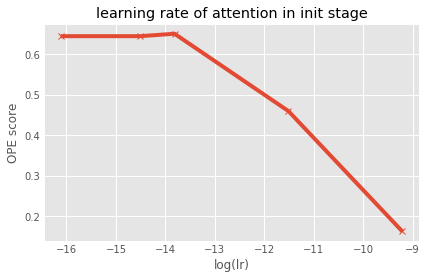

In [162]:
lr = np.array([1e-4, 1e-5, 1e-6, 5e-7, 1e-7])
lr = np.log(lr)
score = [0.163, 0.46, 0.651, 0.645, 0.645]
plt.title("learning rate of attention in init stage")
plt.xlabel("log(lr)")
plt.ylabel("OPE score")
plt.plot(lr, score, marker="x")
plt.savefig("lr_init.svg")
plt.show()

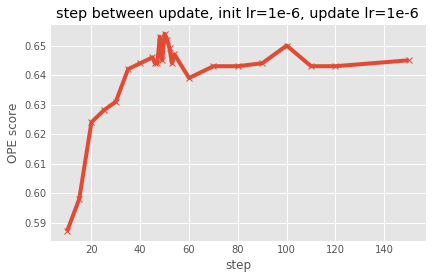

In [161]:
step = np.array([10, 15, 20, 25, 30, 35, 40, 
                 45, 46, 47, 48, 49, 50, 51,
                 52, 53, 54, 60, 70, 80, 90,
                 100, 110, 120, 150])
score_1 = np.array([0.587, 0.598, 0.624, 0.628, 0.631, 0.642, 0.644,
                  0.646, 0.644, 0.644, 0.653, 0.645, 0.654, 0.652,
                  0.649, 0.644, 0.647, 0.639, 0.643, 0.643, 0.644,
                  0.650, 0.643, 0.643, 0.645])
plt.title("step between update, init lr=1e-6, update lr=1e-6")
plt.xlabel("step")
plt.ylabel("OPE score")
plt.plot(step, score_1, marker="x")
plt.savefig("step.svg")
plt.show()

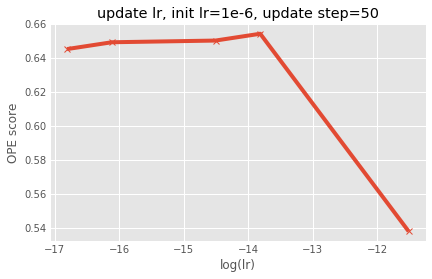

In [177]:
lr = np.array([1e-5, 1e-6, 5e-7, 1e-7, 5e-8])
lr = np.log(lr)
score_2 = np.array([0.538, 0.654, 0.65, 0.649, 0.645])
plt.title("update lr, init lr=1e-6, update step=50")
plt.xlabel("log(lr)")
plt.ylabel("OPE score")
plt.plot(lr, score_2, marker="x")
plt.savefig("update_lr.svg")
plt.show()

In [172]:
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)
def add_plot(ax, xs, ys, zs, color, zdir):
    verts = []
    for z in zs:
        verts.append(list(zip(xs, ys)))
    poly = PolyCollection(verts, facecolors=[cc(color)])
    poly.set_alpha(0.5)
    ax.add_collection3d(poly, zs=zs, zdir=zdir)

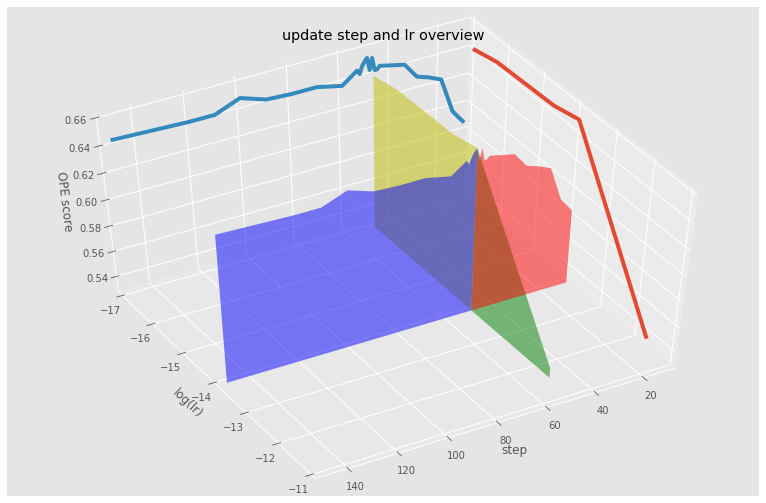

In [181]:
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection="3d")

min_score=0.53

split = 12
xs = list(step[:split+1])
ys = list(score_1[:split+1])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [math.log(1e-6)]
add_plot(ax, xs, ys, zs, "r", zdir="y")

xs = list(step[split:])
ys = list(score_1[split:])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [math.log(1e-6)]
add_plot(ax, xs, ys, zs, "b", zdir="y")

split=1
xs = list(lr[:split+1])
ys = list(score_2[:split+1])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [50]
add_plot(ax, xs, ys, zs, "g", zdir="x")

xs = list(lr[split:])
ys = list(score_2[split:])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [50]
add_plot(ax, xs, ys, zs, "y", zdir="x")

ax.set_title("update step and lr overview")
ax.set_xlabel('step')
ax.set_xlim3d(10, 150)
ax.set_ylabel('log(lr)')
ax.set_ylim3d(-17, -11)
ax.set_zlabel('OPE score')
ax.set_zlim3d(0.53, 0.66)

ax.view_init(elev=50., azim=60)

ax.plot([10]*lr.size, lr , score_2)
ax.plot(step, ([-17]*step.size), score_1)

fig.savefig("update_lr_overview.svg")
plt.show()

In [ ]:
decay = np.array([0.9, 0.99, 0.999, 0.9999, 0.99999])
score_1 = np.array([0.648, 0.657, ])